Project Title: Which is the strongest shape TRIANGLES or HEXAGONS? And using this inference to perform and improve accuracy for community detection and prediction.

Team no: 1

Team member details:

Charvi Bannur - PES1UG20CS638, Section: 'K'

Chaitra Bhat - PES1UG20CS635, Section: 'K'

Shria Guntunur - PES1UG20CS411, Section: 'G'

Shubangi Saxena - PES1UG20CS418, Section: 'G'


Instructions to run: The 3 files provided in the dataset google drive link must be uploaded before this file is run.

NOTE: Please look at the training and testing accuracies once before running as we have used these in our inferences. It is possible that these accuracies change once it runs while the inference remains the same.

Versions of libraries: 
All the default versions for the libraries that are used and installed in colab.

Further info,

pandas version: 1.5.3

numpy version: 1.22.4

mxnet version: 1.9.1

networkx version: 3.1


# Strength Analysis

In [ ]:
import codecs
import os
import spacy
import json
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
print(pd.__version__)
print(np.__version__)
print(nx.__version__)

1.5.3
1.22.4
3.1


# Graph Construction

In [ ]:
# Load the data
f = open("/content/Harry Potter 1 Sorcerer's_Stone.txt", "r")
HarryPotter = f.read()

In [ ]:
characters = ["Harry",
"Hermione",
"Ron",
"Dumbledore",
"Voldemort",
"Hagrid",
"Draco",
"McGonagall",
"Snape",
"Quirrell",
"Neville",
"Vernon",
"Petunia",
"Dudley",
"Hedwig",
"Fred",
"George",
"Lily",
"James",
"Sorting Hat",
"Oliver Wood",
"Filch",
"Seamus",
"Goyle",
"Crabbe",
"Ginny",
"Griphook",
"Ollivander"
]

In [ ]:
HarryPotter = HarryPotter.replace('Harry Potter', 'Harry')
HarryPotter = HarryPotter.replace('Granger','Hermione')
HarryPotter = HarryPotter.replace('Potter', 'Harry')
HarryPotter = HarryPotter.replace('Ron Weasley', 'Ron')
HarryPotter = HarryPotter.replace('Hermione Granger','Hermione')
HarryPotter = HarryPotter.replace('Draco Malfoy', 'Draco')
HarryPotter = HarryPotter.replace('Malfoy','Draco')
HarryPotter = HarryPotter.replace('Albus Dumbledore', 'Dumbledore')
HarryPotter = HarryPotter.replace('Albus','Dubmledore')
HarryPotter = HarryPotter.replace('Rubeus Hagrid', 'Hagrid')
HarryPotter = HarryPotter.replace('Rubeus','Hagrid')
HarryPotter = HarryPotter.replace('You-Know-Who', 'Voldemort')
HarryPotter = HarryPotter.replace('You- Know-Who','Voldemort')
HarryPotter = HarryPotter.replace('He-Who-Must-Not-Be-Named','Voldemort')

In [ ]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Harry,Hermione,Ron,Dumbledore,Voldemort,Hagrid,Draco,McGonagall,Snape,Quirrell,...,James,Sorting Hat,Oliver Wood,Filch,Seamus,Goyle,Crabbe,Ginny,Griphook,Ollivander
Harry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hermione,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dumbledore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Voldemort,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sentences = sent_tokenize(HarryPotter)
print(len(sentences))

6394


In [ ]:
for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and char1 in sentence and char2 in sentence:
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1

char_df.head()

,Harry,Hermione,Ron,Dumbledore,Voldemort,Hagrid,Draco,McGonagall,Snape,Quirrell,...,James,Sorting Hat,Oliver Wood,Filch,Seamus,Goyle,Crabbe,Ginny,Griphook,Ollivander
Harry,0,164,302,50,22,150,68,38,74,50,...,8,0,2,18,18,10,10,0,2,14
Hermione,164,0,152,4,0,22,10,6,22,6,...,0,0,0,0,2,2,2,0,0,0
Ron,302,152,0,10,6,48,30,8,24,4,...,0,0,0,0,2,8,6,2,0,0
Dumbledore,50,4,10,0,8,18,2,20,4,2,...,2,0,0,0,0,0,0,0,0,0
Voldemort,22,0,6,8,0,6,0,0,10,12,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)


In [ ]:
newdf.head()

,Harry,Hermione,Ron,Dumbledore,Voldemort,Hagrid,Draco,McGonagall,Snape,Quirrell,...,James,Sorting Hat,Oliver Wood,Filch,Seamus,Goyle,Crabbe,Ginny,Griphook,Ollivander
Harry,0,164,302,50,22,150,68,38,74,50,...,8,0,2,18,18,10,10,0,2,14
Hermione,164,0,152,4,0,22,10,6,22,6,...,0,0,0,0,2,2,2,0,0,0
Ron,302,152,0,10,6,48,30,8,24,4,...,0,0,0,0,2,8,6,2,0,0
Dumbledore,50,4,10,0,8,18,2,20,4,2,...,2,0,0,0,0,0,0,0,0,0
Voldemort,22,0,6,8,0,6,0,0,10,12,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
newdf=char_df.copy()

In [ ]:
df=newdf.astype(bool).astype(int)
df.head()

,Harry,Hermione,Ron,Dumbledore,Voldemort,Hagrid,Draco,McGonagall,Snape,Quirrell,...,James,Sorting Hat,Oliver Wood,Filch,Seamus,Goyle,Crabbe,Ginny,Griphook,Ollivander
Harry,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1
Hermione,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,1,1,1,0,0,0
Ron,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,0,0
Dumbledore,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
Voldemort,1,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
G = nx.Graph()
G = nx.from_pandas_adjacency(df)


In [ ]:
A = nx.adjacency_matrix(G)
f = nsm.motifs(A)
print(f)

[ -1  -1  -1   0   0   0   0   0   0   0 635   0   0   0   0 285]


In [ ]:
!pip install netsci
import netsci.models.random as nsr
import netsci.metrics.motifs as nsm
import netsci.visualization as nsv
import matplotlib.pyplot as plt
A = nx.adjacency_matrix(G)
f = nsm.motifs(A)
print(f)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.1/464.1 kB 8.2 MB/s eta 0:00:00


IndexError: ignored

In [ ]:
print(A)

  (0, 1)	164
  (0, 2)	302
  (0, 3)	50
  (0, 4)	22
  (0, 5)	150
  (0, 6)	68
  (0, 7)	38
  (0, 8)	74
  (0, 9)	50
  (0, 10)	52
  (0, 11)	56
  (0, 12)	28
  (0, 13)	78
  (0, 14)	6
  (0, 15)	14
  (0, 16)	8
  (0, 17)	8
  (0, 18)	8
  (0, 20)	2
  (0, 21)	18
  (0, 22)	18
  (0, 23)	10
  (0, 24)	10
  (0, 26)	2
  (0, 27)	14
  :	:
  (23, 1)	2
  (23, 2)	8
  (23, 6)	26
  (23, 7)	2
  (23, 8)	2
  (23, 10)	6
  (23, 15)	2
  (23, 16)	2
  (23, 24)	38
  (24, 0)	10
  (24, 1)	2
  (24, 2)	6
  (24, 6)	28
  (24, 7)	2
  (24, 8)	2
  (24, 10)	6
  (24, 15)	2
  (24, 16)	2
  (24, 23)	38
  (25, 2)	2
  (26, 0)	2
  (26, 5)	2
  (27, 0)	14
  (27, 5)	4
  (27, 9)	2


In [ ]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 28
Nodes: ['Harry', 'Hermione', 'Ron', 'Dumbledore', 'Voldemort', 'Hagrid', 'Draco', 'McGonagall', 'Snape', 'Quirrell', 'Neville', 'Vernon', 'Petunia', 'Dudley', 'Hedwig', 'Fred', 'George', 'Lily', 'James', 'Sorting Hat', 'Oliver Wood', 'Filch', 'Seamus', 'Goyle', 'Crabbe', 'Ginny', 'Griphook', 'Ollivander']

Number of edges in the graph: 126
Edges: [('Harry', 'Hermione', {'weight': 164}), ('Harry', 'Ron', {'weight': 302}), ('Harry', 'Dumbledore', {'weight': 50}), ('Harry', 'Voldemort', {'weight': 22}), ('Harry', 'Hagrid', {'weight': 150}), ('Harry', 'Draco', {'weight': 68}), ('Harry', 'McGonagall', {'weight': 38}), ('Harry', 'Snape', {'weight': 74}), ('Harry', 'Quirrell', {'weight': 50}), ('Harry', 'Neville', {'weight': 52}), ('Harry', 'Vernon', {'weight': 56}), ('Harry', 'Petunia', {'weight': 28}), ('Harry', 'Dudley', {'weight': 78}), ('Harry', 'Hedwig', {'weight': 6}), ('Harry', 'Fred', {'weight': 14}), ('Harry', 'George', {'weight': 8}), ('Harry', 'Lil

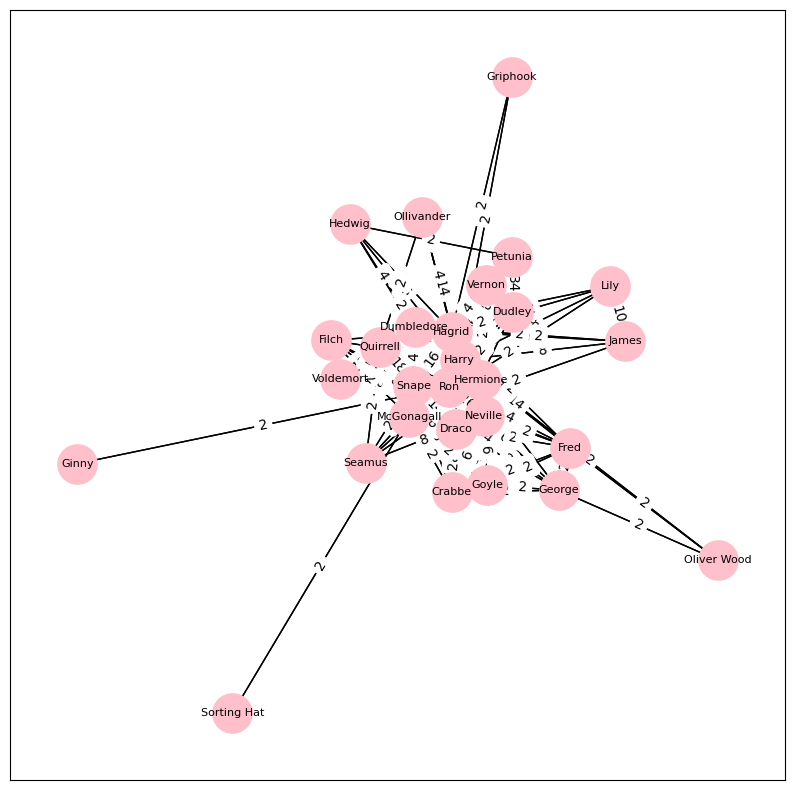

In [ ]:
plt.figure(5, figsize=(10,10))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="pink")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

# Cycles of Length 3

In [ ]:
cycle3 = []

for i in range(0,28):
  for j in range(0,28):
    if(char_df[characters[i]][characters[j]]>0): #if edge exists
      for k in range(0,28):
        if(i!=k and char_df[characters[j]][characters[k]]>0 and char_df[characters[i]][characters[k]]>0):  #if other two edges exist
          if([i,j,k] not in cycle3 and [j,i,k] not in cycle3 and [k,i,j] not in cycle3 and [i,k,j] not in cycle3 and [j,k,i] not in cycle3 and [k,j,i] not in cycle3):
            cycle3.append([i,j,k])
            print(characters[i],characters[j],characters[k]);

Harry Hermione Ron
Harry Hermione Dumbledore
Harry Hermione Hagrid
Harry Hermione Draco
Harry Hermione McGonagall
Harry Hermione Snape
Harry Hermione Quirrell
Harry Hermione Neville
Harry Hermione Vernon
Harry Hermione Seamus
Harry Hermione Goyle
Harry Hermione Crabbe
Harry Ron Dumbledore
Harry Ron Voldemort
Harry Ron Hagrid
Harry Ron Draco
Harry Ron McGonagall
Harry Ron Snape
Harry Ron Quirrell
Harry Ron Neville
Harry Ron Dudley
Harry Ron Hedwig
Harry Ron Fred
Harry Ron George
Harry Ron Seamus
Harry Ron Goyle
Harry Ron Crabbe
Harry Dumbledore Voldemort
Harry Dumbledore Hagrid
Harry Dumbledore Draco
Harry Dumbledore McGonagall
Harry Dumbledore Snape
Harry Dumbledore Quirrell
Harry Dumbledore Neville
Harry Dumbledore Hedwig
Harry Dumbledore Lily
Harry Dumbledore James
Harry Voldemort Hagrid
Harry Voldemort Snape
Harry Voldemort Quirrell
Harry Hagrid Draco
Harry Hagrid McGonagall
Harry Hagrid Snape
Harry Hagrid Neville
Harry Hagrid Vernon
Harry Hagrid Petunia
Harry Hagrid Dudley
Harry Ha

In [ ]:
len(cycle3)

285

In [ ]:
char_df.to_csv("Adajacencymatrix.csv")

# Cycles of Length 6

In [ ]:
cycle6 = []

for i in range(0,28):
  for j in range(0,28):
    if(char_df[characters[i]][characters[j]]>0): #edge btw i and j
      for k in range(0,28):
        if(i!=k and char_df[characters[j]][characters[k]]>0): #edge btw j and k
          for l in range(0,28):
            if(i!=l and j!=l and char_df[characters[l]][characters[k]]>0): #edge between l and k
              for m in range(0,28):
                if(i!=m and j!=m and k!=m and char_df[characters[l]][characters[m]]>0): #edge between l and m
                  for n in range(0,28):
                    if(i!=n and j!=n and k!=n and l!=n and char_df[characters[n]][characters[m]]>0 and char_df[characters[n]][characters[i]]>0): #edge between m and n and edge btw n and i to complete the cycle
                      whatever = []
                      whatever.append(i)
                      whatever.append(j)
                      whatever.append(k)
                      whatever.append(l)
                      whatever.append(m)
                      whatever.append(n)
                      whatever.sort()
                      if(whatever not in cycle6):
                        cycle6.append(whatever)

                      # print(characters[i],characters[j],characters[k],characters[l],characters[m],characters[n])
                  

In [ ]:
x=[]
l=[3,2,1]
l.sort()
x.append(l)
x

[[1, 2, 3]]

In [ ]:
cycle6

[[0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3, 4, 8],
 [0, 1, 2, 3, 4, 9],
 [0, 1, 2, 3, 5, 6],
 [0, 1, 2, 3, 5, 7],
 [0, 1, 2, 3, 5, 8],
 [0, 1, 2, 3, 5, 10],
 [0, 1, 2, 3, 5, 11],
 [0, 1, 2, 3, 5, 12],
 [0, 1, 2, 3, 5, 13],
 [0, 1, 2, 3, 5, 14],
 [0, 1, 2, 3, 5, 15],
 [0, 1, 2, 3, 5, 17],
 [0, 1, 2, 3, 5, 18],
 [0, 1, 2, 3, 5, 21],
 [0, 1, 2, 3, 5, 26],
 [0, 1, 2, 3, 5, 27],
 [0, 1, 2, 3, 6, 7],
 [0, 1, 2, 3, 6, 8],
 [0, 1, 2, 3, 6, 10],
 [0, 1, 2, 3, 6, 13],
 [0, 1, 2, 3, 6, 15],
 [0, 1, 2, 3, 6, 16],
 [0, 1, 2, 3, 6, 21],
 [0, 1, 2, 3, 6, 23],
 [0, 1, 2, 3, 6, 24],
 [0, 1, 2, 3, 7, 8],
 [0, 1, 2, 3, 7, 9],
 [0, 1, 2, 3, 7, 10],
 [0, 1, 2, 3, 7, 17],
 [0, 1, 2, 3, 7, 18],
 [0, 1, 2, 3, 7, 21],
 [0, 1, 2, 3, 7, 23],
 [0, 1, 2, 3, 7, 24],
 [0, 1, 2, 3, 8, 9],
 [0, 1, 2, 3, 8, 10],
 [0, 1, 2, 3, 8, 15],
 [0, 1, 2, 3, 8, 16],
 [0, 1, 2, 3, 8, 21],
 [0, 1, 2, 3, 8, 22],
 [0, 1, 2, 3, 8, 23],
 [0, 1, 2, 3, 8, 24],
 [0, 1, 2, 3, 9, 22],
 [0, 1, 2, 3, 9, 27],
 [0, 1, 2, 3, 10, 15],
 [0, 1, 2, 3, 10, 21

In [ ]:
len(cycle6)

15972

Yes, it is possible for a social network to have more hexagonal cycles than triangular cycles.

In a social network, nodes represent individuals, and edges represent connections between individuals. A cycle is a closed path in the network that starts and ends at the same node, and a hexagonal cycle is a cycle that passes through six nodes, while a triangular cycle passes through three nodes.

The number of hexagonal and triangular cycles in a social network depends on the structure of the network. For example, a social network where most individuals have six connections will tend to have more hexagonal cycles, while a network where most individuals have three connections will tend to have more triangular cycles.

It is possible for a social network to have more hexagonal cycles than triangular cycles if the network has a relatively high degree of clustering. Clustering refers to the tendency for individuals to form clusters or communities in a network. In a highly clustered network, individuals tend to have many connections to others in their cluster, which can result in the formation of hexagonal cycles.

In summary, the number of hexagonal and triangular cycles in a social network depends on the network's structure, and it is possible for a social network to have more hexagonal cycles than triangular cycles if the network is highly clustered.

# Graph Energy

The graph energy is a mathematical concept that is used to characterize the total energy of a graph. The energy of a graph is a sum of the squared absolute values of the eigenvalues of its adjacency matrix. The adjacency matrix of a graph is a square matrix that represents the connections between the nodes of the graph.

The graph energy is a measure of the overall connectivity and organization of a graph. A higher graph energy value indicates that the graph is more strongly connected and better organized, whereas a lower graph energy value indicates a weaker connectivity and organization.

Graph energy has applications in various fields, such as chemistry, physics, and network science. For example, in chemistry, the graph energy of a molecule can be used to predict its reactivity and stability. In physics, the graph energy of a system can be used to analyze its quantum mechanical properties. In network science, the graph energy can be used to compare the overall connectivity and organization of different networks.

In [ ]:
nodes = ["Hagrid", "Draco", "McGonagall"]
subgraph = G.subgraph(nodes)

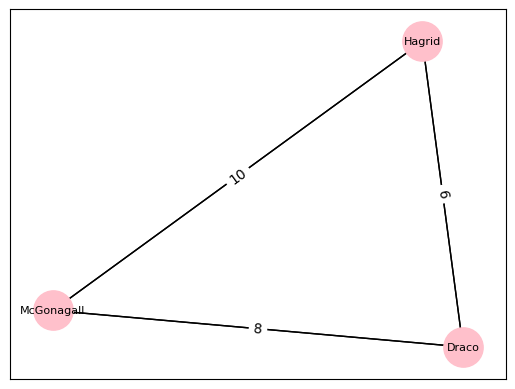

In [ ]:
nx.draw_networkx(subgraph, pos=pos, node_size = 800, font_size=8, node_color="pink")
nx.draw_networkx_edges(subgraph, pos=pos)
edge_labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=edge_labels)
plt.show()

In [ ]:
A = nx.adjacency_matrix(subgraph).todense()
eigvals = np.linalg.eigvals(A)
energy = sum(abs(eigvals)**2)
print("Graph Energy:", energy)

Graph Energy: 400.00000000000017


In [ ]:
TotalEnergy3 = 0
for i in cycle3:
  nodes=[characters[i[0]], characters[i[1]], characters[i[2]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy3 = TotalEnergy3 + energy
TotalEnergy3 / len(cycle3)

20329.43157894737

After removing node 3

In [ ]:
TotalEnergy2 = 0
for i in cycle3:
  nodes=[characters[i[0]], characters[i[1]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy2 = TotalEnergy2 + energy
TotalEnergy2 / len(cycle3)

17160.81403508772

In [ ]:
norm2=(TotalEnergy3-TotalEnergy2)/TotalEnergy3
norm2

0.15586355828763

After removing node 2

In [ ]:
TotalEnergy31 = 0
for i in cycle3:
  nodes=[characters[i[0]], characters[i[2]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy31 = TotalEnergy31 + energy
TotalEnergy31 / len(cycle3)

2597.642105263158

After removing node 1

In [ ]:
TotalEnergy4 = 0
for i in cycle3:
  nodes=[characters[i[1]], characters[i[2]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy4 = TotalEnergy4 + energy
TotalEnergy4 / len(cycle3)

570.9754385964912

In [ ]:
norm4=(TotalEnergy3-TotalEnergy4)/TotalEnergy3
norm4

0.9719138512860449

FOR CYCLE6

In [ ]:
TotalEnergy6 = 0
for i in cycle6:
  nodes=[characters[i[0]], characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]], characters[i[5]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy6 = TotalEnergy6 + energy
TotalEnergy6/len(cycle6)

79143.89030803907

After removing node 1 (index:0)

In [ ]:
TotalEnergy5 = 0
for i in cycle6:
  nodes=[characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]], characters[i[5]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy5 = TotalEnergy5 + energy
TotalEnergy5/len(cycle6)

4662.254445279239

In [ ]:
norm5=(TotalEnergy6-TotalEnergy5)/TotalEnergy6
norm5

0.9410914168215248

After removing node 6

In [ ]:
TotalEnergy5 = 0
for i in cycle6:
  nodes=[characters[i[0]],characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy5 = TotalEnergy5 + energy
TotalEnergy5/len(cycle6)

78003.14901076884

In [ ]:
norm5=(TotalEnergy6-TotalEnergy5)/TotalEnergy6
norm5

0.014413510541752479

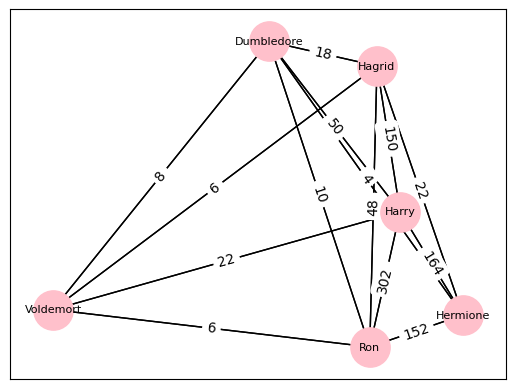

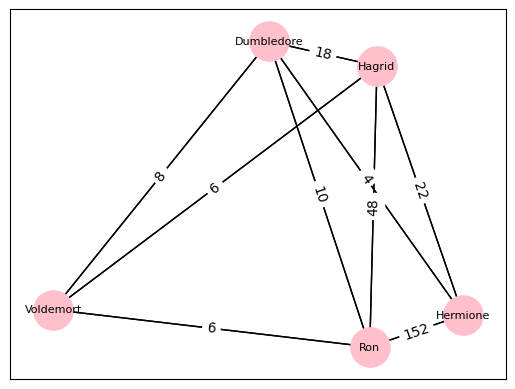

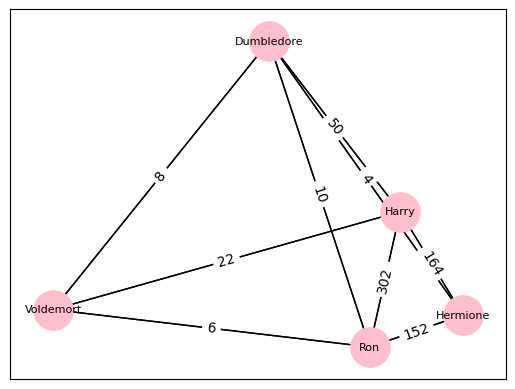

In [ ]:
for i in cycle6:  
  nodes=[characters[i[0]], characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]],characters[i[5]]]
  subgraph = G.subgraph(nodes)
  nx.draw_networkx(subgraph, pos=pos, node_size = 800, font_size=8, node_color="pink")
  nx.draw_networkx_edges(subgraph, pos=pos)
  edge_labels = nx.get_edge_attributes(subgraph, 'weight')
  nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=edge_labels)
  plt.show()

  #remove node 1
  nodes=[ characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]],characters[i[5]]]
  subgraph = G.subgraph(nodes)
  nx.draw_networkx(subgraph, pos=pos, node_size = 800, font_size=8, node_color="pink")
  nx.draw_networkx_edges(subgraph, pos=pos)
  edge_labels = nx.get_edge_attributes(subgraph, 'weight')
  nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=edge_labels)
  plt.show()

  #remove node 6
  nodes=[ characters[i[0]],characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]]]
  subgraph = G.subgraph(nodes)
  nx.draw_networkx(subgraph, pos=pos, node_size = 800, font_size=8, node_color="pink")
  nx.draw_networkx_edges(subgraph, pos=pos)
  edge_labels = nx.get_edge_attributes(subgraph, 'weight')
  nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=edge_labels)
  plt.show()

  break

# Algebraic Connectivity

The algebraic connectivity is a graph metric that characterizes the overall connectivity and robustness of a graph. It is defined as the second smallest eigenvalue of the Laplacian matrix of the graph, which is a square matrix that encodes the connections between the nodes of the graph.

The algebraic connectivity is significant because it provides information about the ability of a graph to maintain connectivity in the face of node or edge failures. A higher algebraic connectivity value indicates that the graph is more robust to such failures, while a lower algebraic connectivity value indicates that the graph is more vulnerable.

The algebraic connectivity has applications in various fields, such as computer science, engineering, and social networks. For example, in computer science, the algebraic connectivity can be used to analyze the robustness of computer networks against cyber attacks. In engineering, the algebraic connectivity can be used to design more reliable communication networks. In social networks, the algebraic connectivity can be used to study the resilience of human social systems against disruptions.

In [ ]:
TotalConnectivity3 = 0
for i in cycle3:
  nodes=[characters[i[0]], characters[i[1]], characters[i[2]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity3 = TotalConnectivity3 + alg_conn
TotalConnectivity3/len(cycle3)

13.043799853985586

After removing node 3

In [ ]:
TotalConnectivity2 = 0
for i in cycle3:
  nodes=[characters[i[0]], characters[i[1]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity2 = TotalConnectivity2 + alg_conn
TotalConnectivity2/len(cycle3)

-1.6532584268453208e-15

After removing node 2

In [ ]:
TotalConnectivity2 = 0
for i in cycle3:
  nodes=[characters[i[0]], characters[i[2]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity2 = TotalConnectivity2 + alg_conn
TotalConnectivity2/len(cycle3)

-2.9294305772565536e-16

After removing node 1

In [ ]:
TotalConnectivity2 = 0
for i in cycle3:
  nodes=[characters[i[1]], characters[i[2]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity2 = TotalConnectivity2 + alg_conn
TotalConnectivity2/len(cycle3)

-5.001846889890179e-16

For cycle6

In [ ]:
TotalConnectivity6 = 0
for i in cycle6:
  nodes=[characters[i[0]], characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]], characters[i[5]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity6 = TotalConnectivity6 + alg_conn
TotalConnectivity6/len(cycle6)

119.77700268168218

After removing node 1

In [ ]:
TotalConnectivity5 = 0
for i in cycle6:
  nodes=[characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]], characters[i[5]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity5 = TotalConnectivity5 + alg_conn
TotalConnectivity5/len(cycle6)

26.483365627689484

After removing node 6

In [ ]:
TotalConnectivity5 = 0
for i in cycle6:
  nodes=[characters[i[0]],characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity5 = TotalConnectivity5 + alg_conn
TotalConnectivity5/len(cycle6)

99.1109943244355

# Inferences

The graph energy and algebraic connectivity can increase or decrease with an increase in the number of nodes in a graph, depending on the specific characteristics of the graph.

For example, in a regular graph where each node has the same number of edges, both the graph energy and algebraic connectivity can increase with an increase in the number of nodes. This is because regular graphs are highly symmetric and well-organized, which leads to a higher energy and algebraic connectivity.

However, in a random graph where the edges are formed randomly, the graph energy and algebraic connectivity may not necessarily increase with an increase in the number of nodes. In fact, the energy and algebraic connectivity of a random graph are typically dependent on the average degree of the graph, rather than the number of nodes.

In summary, the relationship between the number of nodes and the graph energy/algebraic connectivity depends on the specific characteristics of the graph.

# Experimental Validation

KARATE CLUB

In [ ]:
from collections import namedtuple
from networkx import read_edgelist, set_node_attributes
from pandas import read_csv, Series
from numpy import array
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
DataSet = namedtuple(
    'DataSet',
    field_names=['X_train', 'y_train', 'X_test', 'y_test', 'network']
)

def load_karate_club():
    network = read_edgelist(
        'karate.edgelist',
        nodetype=int)

    attributes = read_csv(
        'karate.attributes.csv',
        index_col=['node'])

    for attribute in attributes.columns.values:
        set_node_attributes(
            network,
            values=Series(
                attributes[attribute],
                index=attributes.index).to_dict(),
            name=attribute
        )
  
    X_train,y_train = map(array, zip(*[
        ([node], data['role'] == 'Administrator')
        for node, data in network.nodes(data=True)
        if data['role'] in {'Administrator', 'Instructor'}
    ]))
  
    X_test, y_test = map(array, zip(*[
        ([node], data['community'] == 'Administrator')
        for node, data in network.nodes(data=True)
        if data['role'] == 'Member'
    ]))
 
    return DataSet(
        X_train, y_train,
        X_test, y_test,
        network)

In [ ]:
from networkx import to_numpy_array

In [ ]:
import torch
zkc = load_karate_club()
X_train = zkc.X_train.flatten()
X_test= zkc.X_test.flatten()
y_train = zkc.y_train
y_test = zkc.y_test
print(y_train)
A=to_numpy_array(zkc.network)
#A = to_numpy_matrix(zkc.network)
#A = torch.from_numpy(np.array(A,dtype=object))
print(A)
print(X_train)

[ True False]
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[ 0 33]


In [ ]:
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [ ]:
mxnet.__version__

NameError: ignored

In [ ]:
from networkx import degree_centrality, betweenness_centrality, shortest_path_length,to_numpy_array
import mxnet.ndarray as nd



Viewing the graph:

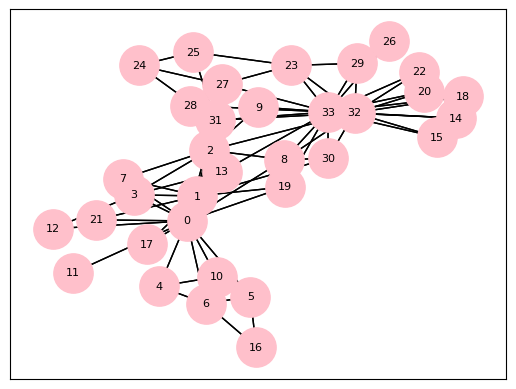

In [ ]:
import networkx as nx
pos = nx.fruchterman_reingold_layout(zkc.network)
nx.draw_networkx(zkc.network, pos=pos, node_size = 800, font_size=8, node_color="pink")
nx.draw_networkx_edges(zkc.network, pos=pos)
edge_labels = nx.get_edge_attributes(zkc.network, 'weight')
nx.draw_networkx_edge_labels(zkc.network, pos=pos, edge_labels=edge_labels)
plt.show()

The GCN model is below:

First, the spectral rule has been implemented. Next, a two-layer architecture is used where the first hidden layer has 4 units and the second hidden layer has 2 units. Finally,  a logistic regression layer is added on top of the GCN for node classification.

In [ ]:
from mxnet.gluon import HybridBlock
from mxnet.gluon.nn import Activation
import mxnet.ndarray as nd

class SpectralRule(HybridBlock):
    def __init__(self, A, in_units, out_units, activation='relu', **kwargs):
        super().__init__(**kwargs)
        I = nd.eye(*A.shape)
        A_hat = A.copy() + I

        D = nd.sum(A_hat, axis=0)
        D_inv = D**-0.5
        D_inv = nd.diag(D_inv)

        A_hat = D_inv * A_hat * D_inv
        
        self.in_units, self.out_units = in_units, out_units
        
        with self.name_scope():
            self.A_hat = self.params.get_constant('A_hat', A_hat)
            self.W = self.params.get(
                'W', shape=(self.in_units, self.out_units)
            )
            if activation == 'identity':
                self.activation = lambda X: X
            else:
                self.activation = Activation(activation)

    def hybrid_forward(self, F, X, A_hat, W):
        aggregate = F.dot(A_hat, X)
        propagate = self.activation(
            F.dot(aggregate, W))
        return propagate

In [ ]:
class LogisticRegressor(HybridBlock):
    def __init__(self, in_units, **kwargs):
        super().__init__(**kwargs)
        with self.name_scope():
            self.w = self.params.get(
                'w', shape=(1, in_units)
            )

            self.b = self.params.get(
                'b', shape=(1, 1)
            )

    def hybrid_forward(self, F, X, w, b):
        # Change shape of b to comply with MXnet addition API
        b = F.broadcast_axis(b, axis=(0,1), size=(34, 1))
        y = F.dot(X, w, transpose_b=True) + b

        return F.sigmoid(y)

In [ ]:
from mxnet.gluon.nn import HybridSequential, Activation
from mxnet.ndarray import array
from mxnet.initializer import One, Uniform, Xavier
from mxnet.gluon.loss import SigmoidBinaryCrossEntropyLoss

def build_features(A, X):
    hidden_layer_specs = [(4, 'tanh'), (2, 'tanh')] # Format: (units in layer, activation function)
    in_units = in_units=X.shape[1]
  
    features = HybridSequential()
    with features.name_scope():
        for i, (layer_size, activation_func) in enumerate(hidden_layer_specs):
            layer = SpectralRule(
                A, in_units=in_units, out_units=layer_size, 
                activation=activation_func)
            features.add(layer)

            in_units = layer_size
    return features, in_units

def build_model(A, X):
    model = HybridSequential()
    hidden_layer_specs = [(4, 'tanh'), (2, 'tanh')]
    in_units = in_units=X.shape[1]

    with model.name_scope():
        features, out_units = build_features(A, X)
        model.add(features)

        classifier = LogisticRegressor(out_units)
        model.add(classifier)

    model.hybridize()
    model.initialize(Uniform(1))

    return model, features

In [ ]:
type(A)

numpy.ndarray

In [ ]:
A

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
import mxnet
X_1 = I = nd.eye(*A.shape)
model_1, features_1 = build_model(nd.array(A), X_1)
#model_1(X_1)

In [ ]:
model_1(X_1)


[[0.37296507]
 [0.37318814]
 [0.3731439 ]
 [0.37353897]
 [0.3687405 ]
 [0.37294304]
 [0.37234062]
 [0.37076518]
 [0.37428105]
 [0.37697908]
 [0.38529056]
 [0.3775322 ]
 [0.37292567]
 [0.37116757]
 [0.37769338]
 [0.3667578 ]
 [0.37239736]
 [0.3763874 ]
 [0.38741082]
 [0.3715641 ]
 [0.37834412]
 [0.37354776]
 [0.3752206 ]
 [0.37326825]
 [0.37362063]
 [0.3643201 ]
 [0.37039787]
 [0.3698834 ]
 [0.37370875]
 [0.37336743]
 [0.37572038]
 [0.37264198]
 [0.36601457]
 [0.3753558 ]]
<NDArray 34x1 @cpu(0)>

In [ ]:

%time
from mxnet import autograd
from mxnet.gluon import Trainer
from mxnet.ndarray import sum as ndsum
import numpy as np

def train(model, features, X, X_train, y_train, epochs):
    cross_entropy = SigmoidBinaryCrossEntropyLoss(from_sigmoid=True)
    trainer = Trainer(model.collect_params(), 'sgd', {'learning_rate': 0.001, 'momentum': 1})

    feature_representations = [features(X).asnumpy()]

    for e in range(1, epochs + 1):
        cum_loss = 0
        cum_preds = []

        for i, x in enumerate(X_train):
            y = array(y_train)[i]
            with autograd.record():
                preds = model(X)[x]
                loss = cross_entropy(preds, y)
            loss.backward()
            trainer.step(1)

            cum_loss += loss.asscalar()
            cum_preds += [preds.asscalar()]

        feature_representations.append(features(X).asnumpy())
            
        #if (e % (epochs//10)) == 0:
        print(f"Epoch {e}/{epochs} -- Loss: {cum_loss: .4f}")
        print(cum_preds)
    return feature_representations

def predict(model, X, nodes):
    preds = model(X)[nodes].asnumpy().flatten()
    return np.where(preds >= 0.5, 1, 0)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 12.4 µs


In [ ]:
X_1


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
<NDArray 34x34 @cpu(0)>

Model 1 below: Feature is identity matrix

This is considered as our baseline model.

In [ ]:
from sklearn.metrics import classification_report

model_3, features_3 = build_model(nd.array(A), X_1)
model_3(X_1)
feature_representations_3= train(model_3, features_3, X_1, X_train, y_train, epochs=100)
y_pred_3 = predict(model_3, X_1, X_test)
print(classification_report(y_test, y_pred_3))

Epoch 1/100 -- Loss:  1.4558
[0.5403239, 0.56839335]
Epoch 2/100 -- Loss:  1.4558
[0.5404112, 0.5684408]
Epoch 3/100 -- Loss:  1.4557
[0.5404445, 0.5684231]
Epoch 4/100 -- Loss:  1.4555
[0.5404238, 0.5683401]
Epoch 5/100 -- Loss:  1.4553
[0.54034925, 0.568192]
Epoch 6/100 -- Loss:  1.4551
[0.5402209, 0.56797886]
Epoch 7/100 -- Loss:  1.4548
[0.5400388, 0.567701]
Epoch 8/100 -- Loss:  1.4544
[0.5398033, 0.5673586]
Epoch 9/100 -- Loss:  1.4540
[0.5395146, 0.56695205]
Epoch 10/100 -- Loss:  1.4535
[0.53917295, 0.56648177]
Epoch 11/100 -- Loss:  1.4530
[0.5387787, 0.56594825]
Epoch 12/100 -- Loss:  1.4525
[0.53833246, 0.5653519]
Epoch 13/100 -- Loss:  1.4519
[0.5378345, 0.56469345]
Epoch 14/100 -- Loss:  1.4513
[0.53728557, 0.5639735]
Epoch 15/100 -- Loss:  1.4506
[0.536686, 0.5631928]
Epoch 16/100 -- Loss:  1.4499
[0.5360367, 0.562352]
Epoch 17/100 -- Loss:  1.4491
[0.5353381, 0.56145215]
Epoch 18/100 -- Loss:  1.4484
[0.5345912, 0.560494]
Epoch 19/100 -- Loss:  1.4475
[0.53379667, 0.5594

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

model_3, features_3 = build_model(nd.array(A), X_1)
model_3(X_1)
feature_representations_3= train(model_3, features_3, X_1, X_train, y_train, epochs=5000)
y_pred_3 = predict(model_3, X_1, X_test)
print(classification_report(y_test, y_pred_3))

Epoch 500/5000 -- Loss:  0.0007
[0.9997912, 0.000512959]
Epoch 1000/5000 -- Loss:  0.0000
[1.0, 8.9488424e-08]
Epoch 1500/5000 -- Loss:  0.0000
[1.0, 1.6404622e-11]
Epoch 2000/5000 -- Loss:  0.0000
[1.0, 3.013723e-15]
Epoch 2500/5000 -- Loss:  0.0000
[1.0, 5.533144e-19]
Epoch 3000/5000 -- Loss:  0.0000
[1.0, 1.0126335e-22]
Epoch 3500/5000 -- Loss:  0.0000
[1.0, 1.8532443e-26]
Epoch 4000/5000 -- Loss:  0.0000
[1.0, 3.3916653e-30]
Epoch 4500/5000 -- Loss:  0.0000
[1.0, 6.2071662e-34]
Epoch 5000/5000 -- Loss:  0.0000
[1.0, 1.1359879e-37]
              precision    recall  f1-score   support

       False       0.40      0.25      0.31        16
        True       0.45      0.62      0.53        16

    accuracy                           0.44        32
   macro avg       0.43      0.44      0.42        32
weighted avg       0.43      0.44      0.42        32



Finding number of cycles

In [ ]:
cycle3_1 = []

for i in range(0,34):
  for j in range(0,34):
    if(A[i][j]>0): #if edge exists
      for k in range(0,34):
        if(i!=k and A[j][k]>0 and A[k][i]>0):  #if other two edges exist
          if([i,j,k] not in cycle3_1 and [j,i,k] not in cycle3_1 and [k,i,j] not in cycle3_1 and [i,k,j] not in cycle3_1 and [j,k,i] not in cycle3_1 and [k,j,i] not in cycle3_1):
            cycle3_1.append([i,j,k])
            #print(characters[i],characters[j],characters[k]);

In [ ]:
len(cycle3_1)

45

In [ ]:
cycle3_1

[[0, 1, 2],
 [0, 1, 3],
 [0, 1, 7],
 [0, 1, 12],
 [0, 1, 13],
 [0, 1, 14],
 [0, 1, 15],
 [0, 2, 3],
 [0, 2, 7],
 [0, 2, 8],
 [0, 2, 12],
 [0, 3, 7],
 [0, 3, 11],
 [0, 3, 12],
 [0, 4, 6],
 [0, 4, 9],
 [0, 5, 6],
 [0, 5, 9],
 [1, 2, 3],
 [1, 2, 7],
 [1, 2, 12],
 [1, 3, 7],
 [1, 3, 12],
 [2, 3, 7],
 [2, 3, 12],
 [2, 8, 21],
 [5, 6, 22],
 [8, 17, 21],
 [8, 17, 23],
 [8, 21, 23],
 [16, 20, 23],
 [16, 21, 23],
 [16, 30, 32],
 [17, 21, 23],
 [19, 23, 29],
 [21, 23, 24],
 [21, 23, 25],
 [21, 23, 26],
 [21, 23, 27],
 [21, 23, 28],
 [21, 23, 29],
 [21, 23, 31],
 [21, 29, 31],
 [23, 29, 31],
 [23, 31, 33]]

In [ ]:
cycle6_1 = []

for i in range(0,34):
  for j in range(0,34):
    if(A[i][j]>0): #edge btw i and j
      for k in range(0,34):
        if(i!=k and A[j][k]>0): #edge btw j and k
          for l in range(0,34):
            if(i!=l and j!=l and A[k][l]>0): #edge between l and k
              for m in range(0,34):
                if(i!=m and j!=m and k!=m and A[l][m]>0): #edge between l and m
                  for n in range(0,34):
                    if(i!=n and j!=n and k!=n and l!=n and A[m][n]>0 and A[n][i]>0): #edge between m and n and edge btw n and i to complete the cycle
                      whatever = []
                      whatever.append(i)
                      whatever.append(j)
                      whatever.append(k)
                      whatever.append(l)
                      whatever.append(m)
                      whatever.append(n)
                      whatever.sort()
                      if(whatever not in cycle6_1):
                        cycle6_1.append(whatever)

                      # print(characters[i],characters[j],characters[k],characters[l],characters[m],characters[n])
                  

In [ ]:
len(cycle6_1)

672

The features being added are:

For each node, the number of cycles it appears in.

In [ ]:
X_3 = nd.zeros((A.shape[0], 2))
for i in cycle3_1:
  for node in i:
     X_3[node][0]+=1
for i in cycle6_1:
  for node in i:
     X_3[node][1]+=1

In [ ]:
X_3


[[ 18. 333.]
 [ 12. 269.]
 [ 11. 346.]
 [ 10. 133.]
 [  2.   1.]
 [  3.   1.]
 [  3.   1.]
 [  6.  96.]
 [  5. 201.]
 [  2.   1.]
 [  0.   0.]
 [  1.  23.]
 [  6. 189.]
 [  1.  26.]
 [  1. 125.]
 [  1.  26.]
 [  3. 146.]
 [  3. 156.]
 [  0.  40.]
 [  1.  40.]
 [  1.  73.]
 [ 13. 227.]
 [  1.   1.]
 [ 15. 366.]
 [  1.  21.]
 [  1.  21.]
 [  1.  21.]
 [  1.  21.]
 [  1.   0.]
 [  4.   0.]
 [  1.   0.]
 [  4.   0.]
 [  1.   0.]
 [  1.   0.]]
<NDArray 34x2 @cpu(0)>

Model using the above feature while concatenating it with the identity matrix

In [ ]:
#X_3 = nd.concat(X_1,X_2,X_3)
X_4=nd.concat(X_1,X_3)
model_3, features_3 = build_model(nd.array(A), X_4)
model_3(X_4)


[[0.5179667 ]
 [0.5223833 ]
 [0.5214108 ]
 [0.5269411 ]
 [0.5141662 ]
 [0.5109241 ]
 [0.5129572 ]
 [0.53293055]
 [0.5294506 ]
 [0.5120415 ]
 [0.50494385]
 [0.5464045 ]
 [0.5294506 ]
 [0.54638517]
 [0.5380643 ]
 [0.5463878 ]
 [0.5269411 ]
 [0.5329305 ]
 [0.5463426 ]
 [0.5329305 ]
 [0.5380643 ]
 [0.51991165]
 [0.50941384]
 [0.517615  ]
 [0.54641277]
 [0.5464009 ]
 [0.5464096 ]
 [0.54641575]
 [0.546399  ]
 [0.52945065]
 [0.5381005 ]
 [0.53293407]
 [0.53810287]
 [0.54674023]]
<NDArray 34x1 @cpu(0)>

In [ ]:
feature_representations_3= train(model_3, features_3, X_4, X_train, y_train, epochs=100)
y_pred_3 = predict(model_3, X_4, X_test)
print(classification_report(y_test, y_pred_3))

Epoch 1/100 -- Loss:  1.1419
[0.39946833, 0.2009331]
Epoch 2/100 -- Loss:  1.1416
[0.3997139, 0.2011554]
Epoch 3/100 -- Loss:  1.1409
[0.40014485, 0.20147967]
Epoch 4/100 -- Loss:  1.1399
[0.40076095, 0.20190589]
Epoch 5/100 -- Loss:  1.1386
[0.40156206, 0.20243378]
Epoch 6/100 -- Loss:  1.1369
[0.40254772, 0.20306318]
Epoch 7/100 -- Loss:  1.1349
[0.40371758, 0.20379375]
Epoch 8/100 -- Loss:  1.1326
[0.4050711, 0.20462507]
Epoch 9/100 -- Loss:  1.1300
[0.40660775, 0.20555675]
Epoch 10/100 -- Loss:  1.1271
[0.40832677, 0.20658816]
Epoch 11/100 -- Loss:  1.1239
[0.41022736, 0.20771869]
Epoch 12/100 -- Loss:  1.1204
[0.4123086, 0.20894748]
Epoch 13/100 -- Loss:  1.1166
[0.4145694, 0.21027367]
Epoch 14/100 -- Loss:  1.1125
[0.4170087, 0.21169624]
Epoch 15/100 -- Loss:  1.1082
[0.4196251, 0.21321395]
Epoch 16/100 -- Loss:  1.1036
[0.42241704, 0.21482542]
Epoch 17/100 -- Loss:  1.0988
[0.42538294, 0.21652904]
Epoch 18/100 -- Loss:  1.0937
[0.428521, 0.2183231]
Epoch 19/100 -- Loss:  1.0885


In [ ]:
feature_representations_3= train(model_3, features_3, X_4, X_train, y_train, epochs=5000)
y_pred_3 = predict(model_3, X_4, X_test)
print(classification_report(y_test, y_pred_3))

Epoch 500/5000 -- Loss:  0.0036
[0.9977749, 0.0013769849]
Epoch 1000/5000 -- Loss:  0.0000
[0.99999857, 3.8284517e-07]
Epoch 1500/5000 -- Loss:  0.0000
[1.0, 2.5712688e-10]
Epoch 2000/5000 -- Loss:  0.0000
[1.0, 1.0162764e-12]
Epoch 2500/5000 -- Loss:  0.0000
[1.0, 1.4710156e-13]
Epoch 3000/5000 -- Loss:  0.0000
[1.0, 2.1435366e-11]
Epoch 3500/5000 -- Loss:  0.0002
[1.0, 0.00018141394]
Epoch 4000/5000 -- Loss:  0.0000
[1.0, 3.970256e-14]
Epoch 4500/5000 -- Loss:  0.0000
[1.0, 5.0177972e-23]
Epoch 5000/5000 -- Loss:  0.0000
[1.0, 1.5884293e-30]
              precision    recall  f1-score   support

       False       0.67      0.88      0.76        16
        True       0.82      0.56      0.67        16

    accuracy                           0.72        32
   macro avg       0.74      0.72      0.71        32
weighted avg       0.74      0.72      0.71        32



Below the feature being added is: 

For each node, 0/1 depending if it appeared in a cycle or not

In [ ]:
X_5 = nd.zeros((A.shape[0], 2))
for i in cycle3_1:
  for node in i:
     X_5[node][0]=1
for i in cycle6_1:
  for node in i:
     X_5[node][1]=1
X_5


[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
<NDArray 34x2 @cpu(0)>

Model for the above feature and concatenating it with the identity matrix

In [ ]:
#X_6=X_5
X_6=nd.concat(X_1,X_5)
model_3, features_3 = build_model(nd.array(A), X_6)
print(model_3(X_6))
feature_representations_3= train(model_3, features_3, X_6, X_train, y_train, epochs=100)
y_pred_3 = predict(model_3, X_6, X_test)
print(classification_report(y_test, y_pred_3))


[[0.32382098]
 [0.32509613]
 [0.3239554 ]
 [0.32343668]
 [0.32153335]
 [0.32628986]
 [0.32521373]
 [0.3295564 ]
 [0.32714784]
 [0.3291595 ]
 [0.35417828]
 [0.32060406]
 [0.32484898]
 [0.3165659 ]
 [0.31973585]
 [0.3316088 ]
 [0.3253776 ]
 [0.32660082]
 [0.32276508]
 [0.32080096]
 [0.3244985 ]
 [0.32381943]
 [0.3307243 ]
 [0.3234142 ]
 [0.3285477 ]
 [0.3226679 ]
 [0.32803047]
 [0.3344856 ]
 [0.3313096 ]
 [0.32524735]
 [0.32105455]
 [0.32085162]
 [0.32664686]
 [0.3240618 ]]
<NDArray 34x1 @cpu(0)>
Epoch 1/100 -- Loss:  1.5194
[0.32382098, 0.3242102]
Epoch 2/100 -- Loss:  1.5192
[0.32404602, 0.32450458]
Epoch 3/100 -- Loss:  1.5187
[0.32442504, 0.32494494]
Epoch 4/100 -- Loss:  1.5179
[0.32495797, 0.3255311]
Epoch 5/100 -- Loss:  1.5169
[0.32564473, 0.32626295]
Epoch 6/100 -- Loss:  1.5156
[0.32648522, 0.32714036]
Epoch 7/100 -- Loss:  1.5141
[0.32747933, 0.328163]
Epoch 8/100 -- Loss:  1.5123
[0.32862693, 0.32933065]
Epoch 9/100 -- Loss:  1.5103
[0.3299278, 0.330643]
Epoch 10/100 -- Loss

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#X_6=X_5
X_6=nd.concat(X_1,X_5)
model_3, features_3 = build_model(nd.array(A), X_6)
print(model_3(X_6))
feature_representations_3= train(model_3, features_3, X_6, X_train, y_train, epochs=5000)
y_pred_3 = predict(model_3, X_6, X_test)
print(classification_report(y_test, y_pred_3))


[[0.27892497]
 [0.2786535 ]
 [0.27885625]
 [0.27729917]
 [0.27731118]
 [0.2795008 ]
 [0.27957657]
 [0.27707726]
 [0.27678445]
 [0.2769948 ]
 [0.3002096 ]
 [0.26985264]
 [0.27792946]
 [0.28436393]
 [0.27447844]
 [0.27853984]
 [0.27650034]
 [0.27622613]
 [0.2706243 ]
 [0.27873725]
 [0.27409914]
 [0.27826005]
 [0.28290734]
 [0.27886075]
 [0.2722733 ]
 [0.28479993]
 [0.27065092]
 [0.27927738]
 [0.27051613]
 [0.2776721 ]
 [0.27720803]
 [0.27858883]
 [0.27346814]
 [0.2744386 ]]
<NDArray 34x1 @cpu(0)>
Epoch 1/5000 -- Loss:  1.5978
[0.27892497, 0.27458233]
Epoch 2/5000 -- Loss:  1.5974
[0.27915984, 0.2748954]
Epoch 3/5000 -- Loss:  1.5966
[0.2795744, 0.27537793]
Epoch 4/5000 -- Loss:  1.5954
[0.2801688, 0.27603006]
Epoch 5/5000 -- Loss:  1.5937
[0.2809433, 0.27685195]
Epoch 6/5000 -- Loss:  1.5917
[0.2818982, 0.27784383]
Epoch 7/5000 -- Loss:  1.5893
[0.2830338, 0.27900594]
Epoch 8/5000 -- Loss:  1.5865
[0.2843505, 0.28033856]
Epoch 9/5000 -- Loss:  1.5834
[0.28584883, 0.28184202]
Epoch 10/50

KeyboardInterrupt: ignored

From the above two models, it can be seen that using the cycles that the node appears in definitely increases the accuracy of the model.

Moreover, it can be seen that the second model(feature: 0/1 depending on if the node appears in a cycle), performs better than the first.

Proving that hexagons helps boost the accuracy of the model than that of triangles.

Below the feature being added is the number of times a node appears in a cycle but the model is split into two-one for triangles and one for hexagons

In [ ]:
X_7 = nd.zeros((A.shape[0], 1))
for i in cycle3_1:
  for node in i:
     X_7[node][0]+=1
X_8 = nd.zeros((A.shape[0], 1))
for i in cycle6_1:
  for node in i:
     X_8[node][0]+=1

X_7 is the feature that tells us the number of times a node appeared in a cycle of length 3 and X_8 is the feature that tells us the number of times a node appeared in a cycle of length 6.

In [ ]:
X_7=nd.concat(X_1,X_7)
model_3, features_3 = build_model(nd.array(A), X_7)
print(model_3(X_7))
feature_representations_3= train(model_3, features_3, X_7, X_train, y_train, epochs=100)
y_pred_3 = predict(model_3, X_7, X_test)
print(classification_report(y_test, y_pred_3))


[[0.6979481 ]
 [0.69723535]
 [0.69667363]
 [0.6951346 ]
 [0.6881926 ]
 [0.69643235]
 [0.70095503]
 [0.6984027 ]
 [0.6923291 ]
 [0.7004488 ]
 [0.6724116 ]
 [0.6898331 ]
 [0.6922736 ]
 [0.7047528 ]
 [0.71150243]
 [0.70099115]
 [0.69414455]
 [0.7075158 ]
 [0.6995478 ]
 [0.69949377]
 [0.7046067 ]
 [0.6977357 ]
 [0.7041006 ]
 [0.6977061 ]
 [0.68337137]
 [0.67663556]
 [0.69951326]
 [0.6949233 ]
 [0.68514216]
 [0.69879216]
 [0.70801044]
 [0.69696516]
 [0.6944202 ]
 [0.68114156]]
<NDArray 34x1 @cpu(0)>
Epoch 1/100 -- Loss:  1.5028
[0.6979481, 0.6812078]
Epoch 2/100 -- Loss:  1.5025
[0.6979316, 0.6810962]
Epoch 3/100 -- Loss:  1.5018
[0.6977536, 0.68080664]
Epoch 4/100 -- Loss:  1.5009
[0.6974141, 0.6803392]
Epoch 5/100 -- Loss:  1.4996
[0.6969131, 0.67969376]
Epoch 6/100 -- Loss:  1.4980
[0.69625056, 0.6788703]
Epoch 7/100 -- Loss:  1.4960
[0.6954265, 0.67786866]
Epoch 8/100 -- Loss:  1.4938
[0.69444096, 0.6766888]
Epoch 9/100 -- Loss:  1.4912
[0.69329387, 0.6753305]
Epoch 10/100 -- Loss:  1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_7=nd.concat(X_1,X_7)
model_3, features_3 = build_model(nd.array(A), X_7)
print(model_3(X_7))
feature_representations_3= train(model_3, features_3, X_7, X_train, y_train, epochs=100)
y_pred_3 = predict(model_3, X_7, X_test)
print(classification_report(y_test, y_pred_3))


[[0.27936447]
 [0.2794988 ]
 [0.27933797]
 [0.27965903]
 [0.28113008]
 [0.27946708]
 [0.27987838]
 [0.27953252]
 [0.27940497]
 [0.2799175 ]
 [0.27782714]
 [0.28126898]
 [0.27940616]
 [0.2807575 ]
 [0.27895692]
 [0.27858493]
 [0.2791136 ]
 [0.28012267]
 [0.2795817 ]
 [0.27869233]
 [0.27956566]
 [0.27938268]
 [0.28041467]
 [0.2792799 ]
 [0.28119674]
 [0.27838445]
 [0.27838248]
 [0.27907333]
 [0.28018144]
 [0.27990115]
 [0.27951166]
 [0.27992758]
 [0.27860522]
 [0.27953458]]
<NDArray 34x1 @cpu(0)>
Epoch 1/100 -- Loss:  1.6033
[0.27936447, 0.2796798]
Epoch 2/100 -- Loss:  1.6029
[0.27959844, 0.28000283]
Epoch 3/100 -- Loss:  1.6021
[0.28001016, 0.28050372]
Epoch 4/100 -- Loss:  1.6010
[0.2805997, 0.28118268]
Epoch 5/100 -- Loss:  1.5994
[0.28136745, 0.28203997]
Epoch 6/100 -- Loss:  1.5975
[0.28231347, 0.2830758]
Epoch 7/100 -- Loss:  1.5952
[0.28343818, 0.28429055]
Epoch 8/100 -- Loss:  1.5926
[0.2847419, 0.28568462]
Epoch 9/100 -- Loss:  1.5896
[0.28622502, 0.2872583]
Epoch 10/100 -- Lo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_7=nd.concat(X_1,X_7)
model_3, features_3 = build_model(nd.array(A), X_7)
print(model_3(X_7))
feature_representations_3= train(model_3, features_3, X_7, X_train, y_train, epochs=5000)
y_pred_3 = predict(model_3, X_7, X_test)
print(classification_report(y_test, y_pred_3))


[[0.5226396 ]
 [0.5270827 ]
 [0.52459645]
 [0.5327337 ]
 [0.525947  ]
 [0.5176379 ]
 [0.52636015]
 [0.5330097 ]
 [0.52146995]
 [0.52803206]
 [0.5224489 ]
 [0.528861  ]
 [0.5275249 ]
 [0.53305775]
 [0.5261056 ]
 [0.52135557]
 [0.5237588 ]
 [0.52964896]
 [0.51887774]
 [0.52082807]
 [0.52242947]
 [0.52237535]
 [0.51713914]
 [0.5211786 ]
 [0.5293599 ]
 [0.5275892 ]
 [0.5291563 ]
 [0.54838187]
 [0.51632416]
 [0.52906936]
 [0.520063  ]
 [0.53511524]
 [0.5172097 ]
 [0.5448391 ]]
<NDArray 34x1 @cpu(0)>
Epoch 500/5000 -- Loss:  0.0268
[0.98598886, 0.0126054445]
Epoch 1000/5000 -- Loss:  0.0000
[0.9999995, 4.635547e-07]
Epoch 1500/5000 -- Loss:  0.0000
[1.0, 2.0082274e-11]
Epoch 2000/5000 -- Loss:  0.0000
[1.0, 8.4027786e-16]
Epoch 2500/5000 -- Loss:  0.0000
[1.0, 3.7910928e-20]
Epoch 3000/5000 -- Loss:  0.0000
[1.0, 1.7754366e-24]
Epoch 3500/5000 -- Loss:  0.0000
[1.0, 8.4442705e-29]
Epoch 4000/5000 -- Loss:  0.0000
[1.0, 4.045975e-33]
Epoch 4500/5000 -- Loss:  0.0000
[1.0, 1.9402988e-37]
Epoc

In [ ]:
X_8=nd.concat(X_1,X_8)
model_3, features_3 = build_model(nd.array(A), X_8)
print(model_3(X_8))
feature_representations_3= train(model_3, features_3, X_8, X_train, y_train, epochs=100)
y_pred_3 = predict(model_3, X_8, X_test)
print(classification_report(y_test, y_pred_3))


[[0.42661676]
 [0.43012822]
 [0.4293438 ]
 [0.4338204 ]
 [0.41684446]
 [0.42286757]
 [0.4233009 ]
 [0.4385064 ]
 [0.43569726]
 [0.42301375]
 [0.43296874]
 [0.44985288]
 [0.43570608]
 [0.44971445]
 [0.44231096]
 [0.4489802 ]
 [0.43373573]
 [0.43839732]
 [0.44849566]
 [0.438458  ]
 [0.4423559 ]
 [0.42815545]
 [0.4228666 ]
 [0.42631844]
 [0.44930404]
 [0.44839764]
 [0.45018739]
 [0.4499863 ]
 [0.4490951 ]
 [0.43577665]
 [0.44283745]
 [0.43882188]
 [0.44277903]
 [0.44787207]]
<NDArray 34x1 @cpu(0)>
Epoch 1/100 -- Loss:  1.4461
[0.42661676, 0.4480263]
Epoch 2/100 -- Loss:  1.4460
[0.42678398, 0.448182]
Epoch 3/100 -- Loss:  1.4458
[0.42699903, 0.44833884]
Epoch 4/100 -- Loss:  1.4455
[0.42726186, 0.4484966]
Epoch 5/100 -- Loss:  1.4450
[0.42757213, 0.44865498]
Epoch 6/100 -- Loss:  1.4445
[0.42792973, 0.4488137]
Epoch 7/100 -- Loss:  1.4438
[0.42833436, 0.44897214]
Epoch 8/100 -- Loss:  1.4431
[0.42878583, 0.44913006]
Epoch 9/100 -- Loss:  1.4422
[0.4292838, 0.4492869]
Epoch 10/100 -- Loss

In [ ]:
X_8=nd.concat(X_1,X_8)
model_3, features_3 = build_model(nd.array(A), X_8)
print(model_3(X_8))
feature_representations_3= train(model_3, features_3, X_8, X_train, y_train, epochs=100)
y_pred_3 = predict(model_3, X_8, X_test)
print(classification_report(y_test, y_pred_3))


[[0.29017612]
 [0.30060542]
 [0.29830104]
 [0.31143436]
 [0.28589392]
 [0.28136402]
 [0.2860643 ]
 [0.32562587]
 [0.3173949 ]
 [0.28352487]
 [0.22289181]
 [0.35652426]
 [0.3173949 ]
 [0.3564279 ]
 [0.33761957]
 [0.3564479 ]
 [0.31143436]
 [0.32562578]
 [0.35630083]
 [0.32562578]
 [0.33761957]
 [0.2947563 ]
 [0.3037258 ]
 [0.28935063]
 [0.35652372]
 [0.35640827]
 [0.3563365 ]
 [0.35655147]
 [0.35640767]
 [0.317395  ]
 [0.33770016]
 [0.32562813]
 [0.3376607 ]
 [0.3573119 ]]
<NDArray 34x1 @cpu(0)>
Epoch 1/100 -- Loss:  1.6797
[0.29017612, 0.35749745]
Epoch 2/100 -- Loss:  1.6793
[0.29039285, 0.35777488]
Epoch 3/100 -- Loss:  1.6787
[0.29074258, 0.35814387]
Epoch 4/100 -- Loss:  1.6778
[0.29122522, 0.3586041]
Epoch 5/100 -- Loss:  1.6765
[0.29184082, 0.35915515]
Epoch 6/100 -- Loss:  1.6750
[0.29258937, 0.35979646]
Epoch 7/100 -- Loss:  1.6731
[0.29347092, 0.36052743]
Epoch 8/100 -- Loss:  1.6709
[0.29448545, 0.36134726]
Epoch 9/100 -- Loss:  1.6685
[0.29563296, 0.36225522]
Epoch 10/100 -

In [ ]:
X_8=nd.concat(X_1,X_8)
model_3, features_3 = build_model(nd.array(A), X_8)
print(model_3(X_8))
feature_representations_3= train(model_3, features_3, X_8, X_train, y_train, epochs=5000)
y_pred_3 = predict(model_3, X_8, X_test)
print(classification_report(y_test, y_pred_3))


[[0.41294786]
 [0.40638703]
 [0.40782818]
 [0.39965987]
 [0.42757154]
 [0.41249886]
 [0.4124183 ]
 [0.39089724]
 [0.3959788 ]
 [0.4013664 ]
 [0.3229094 ]
 [0.37121022]
 [0.3959788 ]
 [0.37117326]
 [0.3834654 ]
 [0.37128854]
 [0.3996607 ]
 [0.39089975]
 [0.37159806]
 [0.39089972]
 [0.38346535]
 [0.41005385]
 [0.42828467]
 [0.41347203]
 [0.36991102]
 [0.37086582]
 [0.3701081 ]
 [0.37095162]
 [0.37077492]
 [0.39597633]
 [0.38313347]
 [0.39084432]
 [0.38328496]
 [0.36455622]]
<NDArray 34x1 @cpu(0)>
Epoch 500/5000 -- Loss:  0.0030
[0.99964356, 0.0026111582]
Epoch 1000/5000 -- Loss:  0.0000
[0.9999869, 2.88871e-07]
Epoch 1500/5000 -- Loss:  0.0000
[0.99999976, 3.262374e-11]
Epoch 2000/5000 -- Loss:  0.0000
[1.0, 3.7547327e-15]
Epoch 2500/5000 -- Loss:  0.0000
[1.0, 4.404345e-19]
Epoch 3000/5000 -- Loss:  0.0000
[1.0, 5.2654313e-23]
Epoch 3500/5000 -- Loss:  0.0000
[1.0, 6.4340266e-27]
Epoch 4000/5000 -- Loss:  0.0000
[1.0, 8.016917e-31]
Epoch 4500/5000 -- Loss:  0.0000
[1.0, 1.0189046e-34]


From the above two models, it can be seen that by concatenating identity matrix and X_8 together, we get a higher accuracy than that of X_7 which proves our theory that hexagons are stronger and add more value.

Below the feature being added iseither 0/1 for a node, depending on if it appears in a cycle but the model is split into two-one for triangles and one for hexagons

In [ ]:
X_9 = nd.zeros((A.shape[0], 1))
for i in cycle3_1:
  for node in i:
     X_9[node][0]=1
X_10 = nd.zeros((A.shape[0], 1))
for i in cycle6_1:
  for node in i:
     X_10[node][0]=1

In [ ]:
X_10 = nd.zeros((A.shape[0], 1))
for i in cycle6_1:
  for node in i:
     X_10[node][0]=1

X_9 consists of the features that tells us if a node appeared in a cycle of length 3 or not and X_10 consists of the features that tells us if a node appeared in a cycle of length 6 or not.

In [ ]:
X_10


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
<NDArray 34x1 @cpu(0)>

In [ ]:
X_9=nd.concat(X_1,X_9)
model_3, features_3 = build_model(nd.array(A), X_9)
print(model_3(X_9))
feature_representations_3= train(model_3, features_3, X_9, X_train, y_train, epochs=100)
y_pred_3 = predict(model_3, X_9, X_test)
print(classification_report(y_test, y_pred_3))


[[0.5969849 ]
 [0.596696  ]
 [0.5967169 ]
 [0.5959865 ]
 [0.5965447 ]
 [0.5962217 ]
 [0.5965033 ]
 [0.5978034 ]
 [0.59678304]
 [0.59824425]
 [0.59721655]
 [0.5946266 ]
 [0.5985661 ]
 [0.59653646]
 [0.5959624 ]
 [0.59894526]
 [0.59789693]
 [0.5946882 ]
 [0.5969403 ]
 [0.5964127 ]
 [0.59616995]
 [0.5966195 ]
 [0.6025984 ]
 [0.596848  ]
 [0.5991243 ]
 [0.60129046]
 [0.5991148 ]
 [0.5990671 ]
 [0.60075605]
 [0.59564507]
 [0.59714526]
 [0.5977937 ]
 [0.59494823]
 [0.6007388 ]]
<NDArray 34x1 @cpu(0)>
Epoch 1/100 -- Loss:  1.4342
[0.5969849, 0.60083556]
Epoch 2/100 -- Loss:  1.4342
[0.59703416, 0.6008321]
Epoch 3/100 -- Loss:  1.4340
[0.59698784, 0.6007283]
Epoch 4/100 -- Loss:  1.4337
[0.596846, 0.60052437]
Epoch 5/100 -- Loss:  1.4333
[0.59660876, 0.6002203]
Epoch 6/100 -- Loss:  1.4329
[0.59627634, 0.59981644]
Epoch 7/100 -- Loss:  1.4323
[0.5958489, 0.5993131]
Epoch 8/100 -- Loss:  1.4317
[0.5953269, 0.5987106]
Epoch 9/100 -- Loss:  1.4310
[0.59471065, 0.59800947]
Epoch 10/100 -- Loss:  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_9=nd.concat(X_1,X_9)
model_3, features_3 = build_model(nd.array(A), X_9)
print(model_3(X_9))
feature_representations_3= train(model_3, features_3, X_9, X_train, y_train, epochs=5000)
y_pred_3 = predict(model_3, X_9, X_test)
print(classification_report(y_test, y_pred_3))


[[0.449927  ]
 [0.44802478]
 [0.4479793 ]
 [0.4473323 ]
 [0.46354604]
 [0.44049895]
 [0.44820267]
 [0.43106285]
 [0.44640097]
 [0.44327548]
 [0.42242947]
 [0.4427535 ]
 [0.43767977]
 [0.4152144 ]
 [0.4420459 ]
 [0.4068467 ]
 [0.4527115 ]
 [0.4536315 ]
 [0.42840812]
 [0.4586172 ]
 [0.43613517]
 [0.44860873]
 [0.45232725]
 [0.44965717]
 [0.39818814]
 [0.40594897]
 [0.43506503]
 [0.4413454 ]
 [0.41293013]
 [0.43653506]
 [0.434208  ]
 [0.44336754]
 [0.46294644]
 [0.45468032]]
<NDArray 34x1 @cpu(0)>
Epoch 500/5000 -- Loss:  0.0005
[0.9999293, 0.00044077178]
Epoch 1000/5000 -- Loss:  0.0000
[0.9999951, 1.3459142e-07]
Epoch 1500/5000 -- Loss:  0.0000
[0.9999628, 5.8812684e-11]
Epoch 2000/5000 -- Loss:  0.0000
[1.0, 5.4047966e-14]
Epoch 2500/5000 -- Loss:  0.0000
[1.0, 4.95697e-17]
Epoch 3000/5000 -- Loss:  0.0000
[1.0, 4.5462493e-20]
Epoch 3500/5000 -- Loss:  0.0000
[1.0, 4.1641553e-23]
Epoch 4000/5000 -- Loss:  0.0000
[1.0, 3.811847e-26]
Epoch 4500/5000 -- Loss:  0.0000
[1.0, 3.4893463e-29]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_10=nd.concat(X_1,X_10)
model_3, features_3 = build_model(nd.array(A), X_10)
print(model_3(X_10))
feature_representations_3= train(model_3, features_3, X_10, X_train, y_train, epochs=100)
y_pred_3 = predict(model_3, X_10, X_test)
print(classification_report(y_test, y_pred_3))


[[0.5452912 ]
 [0.5454033 ]
 [0.54533446]
 [0.5452704 ]
 [0.54656565]
 [0.54507995]
 [0.5437336 ]
 [0.54408675]
 [0.54523677]
 [0.5447847 ]
 [0.54095113]
 [0.54438627]
 [0.54506415]
 [0.5463257 ]
 [0.5447946 ]
 [0.5459011 ]
 [0.54537374]
 [0.5448478 ]
 [0.5437739 ]
 [0.5437644 ]
 [0.5442356 ]
 [0.54534614]
 [0.54634094]
 [0.54535097]
 [0.54421693]
 [0.5478348 ]
 [0.5447993 ]
 [0.5444375 ]
 [0.5454569 ]
 [0.54574984]
 [0.54446596]
 [0.54545647]
 [0.54214996]
 [0.5425746 ]]
<NDArray 34x1 @cpu(0)>
Epoch 1/100 -- Loss:  1.3888
[0.5452912, 0.5426875]
Epoch 2/100 -- Loss:  1.3888
[0.545382, 0.5427518]
Epoch 3/100 -- Loss:  1.3887
[0.5454291, 0.5427674]
Epoch 4/100 -- Loss:  1.3887
[0.54543227, 0.5427343]
Epoch 5/100 -- Loss:  1.3886
[0.5453917, 0.5426525]
Epoch 6/100 -- Loss:  1.3884
[0.5453072, 0.54252213]
Epoch 7/100 -- Loss:  1.3883
[0.545179, 0.5423432]
Epoch 8/100 -- Loss:  1.3881
[0.5450073, 0.5421159]
Epoch 9/100 -- Loss:  1.3879
[0.5447921, 0.54184043]
Epoch 10/100 -- Loss:  1.3877


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_10=nd.concat(X_1,X_10)
model_3, features_3 = build_model(nd.array(A), X_10)
print(model_3(X_10))
feature_representations_3= train(model_3, features_3, X_10, X_train, y_train, epochs=5000)
y_pred_3 = predict(model_3, X_10, X_test)
print(classification_report(y_test, y_pred_3))


[[0.7080936 ]
 [0.7079525 ]
 [0.7112951 ]
 [0.70317346]
 [0.70873475]
 [0.70885074]
 [0.7324642 ]
 [0.71249753]
 [0.70978117]
 [0.7179765 ]
 [0.76838106]
 [0.70889884]
 [0.7151584 ]
 [0.6686872 ]
 [0.7062227 ]
 [0.7234348 ]
 [0.71074057]
 [0.70553917]
 [0.7354285 ]
 [0.69343764]
 [0.7222098 ]
 [0.7082248 ]
 [0.7117739 ]
 [0.70887685]
 [0.7206643 ]
 [0.72338843]
 [0.7379661 ]
 [0.7275046 ]
 [0.7089175 ]
 [0.7105246 ]
 [0.7114751 ]
 [0.7153212 ]
 [0.6945309 ]
 [0.67037386]]
<NDArray 34x1 @cpu(0)>
Epoch 500/5000 -- Loss:  0.0000
[1.0, 2.804077e-05]
Epoch 1000/5000 -- Loss:  0.0000
[1.0, 4.9650826e-12]
Epoch 1500/5000 -- Loss:  0.0000
[1.0, 9.29431e-19]
Epoch 2000/5000 -- Loss:  0.0000
[1.0, 1.7392036e-25]
Epoch 2500/5000 -- Loss:  0.0000
[1.0, 3.2544463e-32]
Epoch 3000/5000 -- Loss:  0.0000
[1.0, 6.089903e-39]
Epoch 3500/5000 -- Loss:  0.0000
[1.0, 0.0]
Epoch 4000/5000 -- Loss:  0.0000
[1.0, 0.0]
Epoch 4500/5000 -- Loss:  0.0000
[1.0, 0.0]
Epoch 5000/5000 -- Loss:  0.0000
[1.0, 0.0]
    

From the above two models, it can be seen that by concatenating identity matrix and X_10 together, we get a higher accuracy than that of X_9 which proves our theory that hexagons are stronger and add more value.